<h2 style="text-align: center;"><strong>Prétraitement de dataset des offres d'emplois</strong></h2>
<h3 style="text-align: left;">Réalisé par  :</h3>
<ul>
<li>ARI Chaymaa</li>
<li>ASSAG Khadija</li>
<li>AIT BRIK Sara</li>
<li>ISLAH Zineb</li>
</ul>
<h3>Encadré par :</h3>
<ul>
    <li><p>Prof : LAMGHARI Nidal</p>
        

</ul>

### <b>Les bibliothèques :</b>

In [1]:

import missingno as mno
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.metrics.pairwise import cosine_similarity

### <b>Lire Dataset :</b>

In [19]:
df=pd.read_csv('data job posts.csv')

In [20]:
df.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [21]:
df.shape

(19001, 24)

### <b>Visualiser les nombre de valeurs nulls dans chaque colonne:</b>

In [22]:
#check the missing values in a given DataFrame
def showme_all_mv(df):
    return df.isna().sum()

showme_all_mv(df)

jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17793
Term                11325
Eligibility         14071
Audience            18361
StartDate            9326
Duration             8203
Location               32
JobDescription       3892
JobRequirment        2522
RequiredQual          484
Salary               9379
ApplicationP           60
OpeningDate           706
Deadline               65
Notes               16790
AboutC               6531
Attach              17442
Year                    0
Month                   0
IT                      0
dtype: int64

<Axes: >

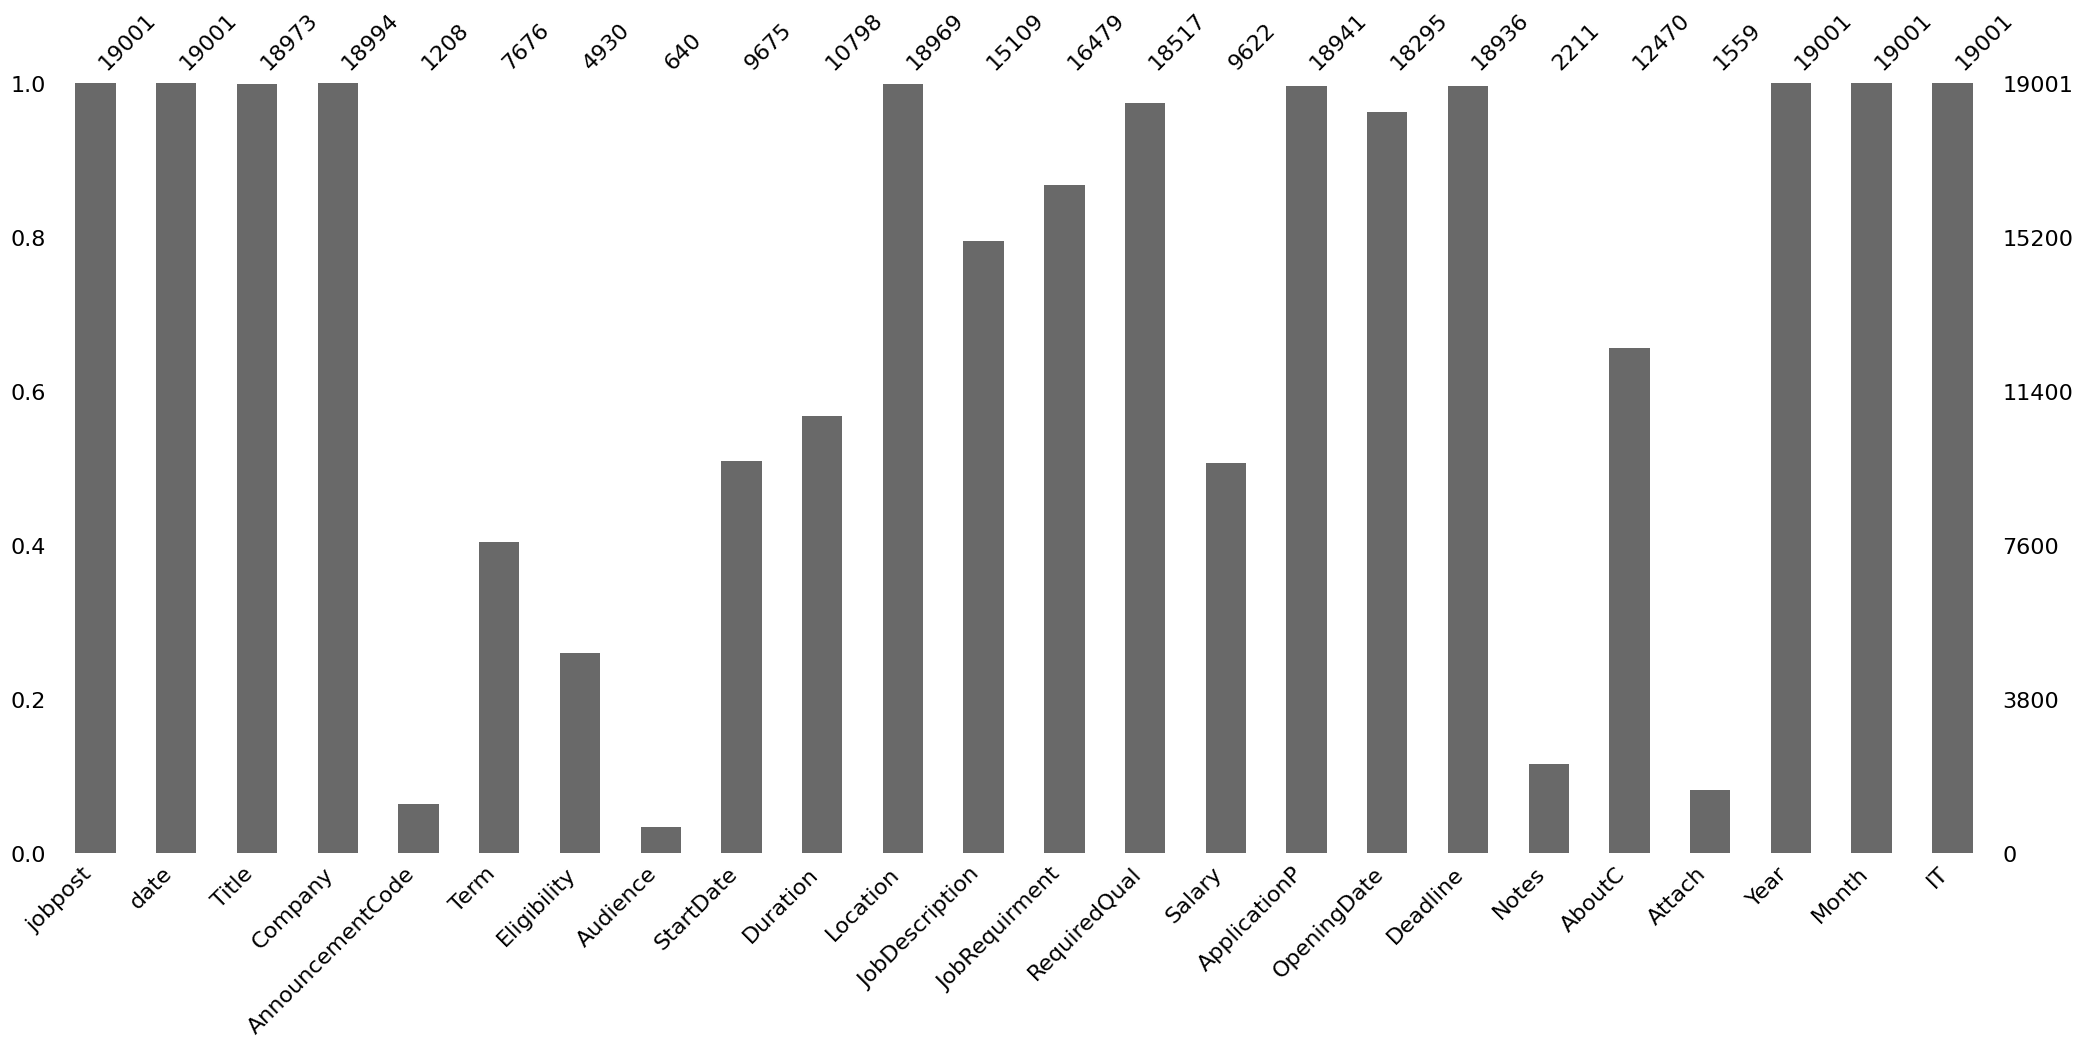

In [23]:
mno.bar(df)

### <b>Visualiser les nombre des offres emplois en fontion de l'année , le mois et aussi IT:</b>

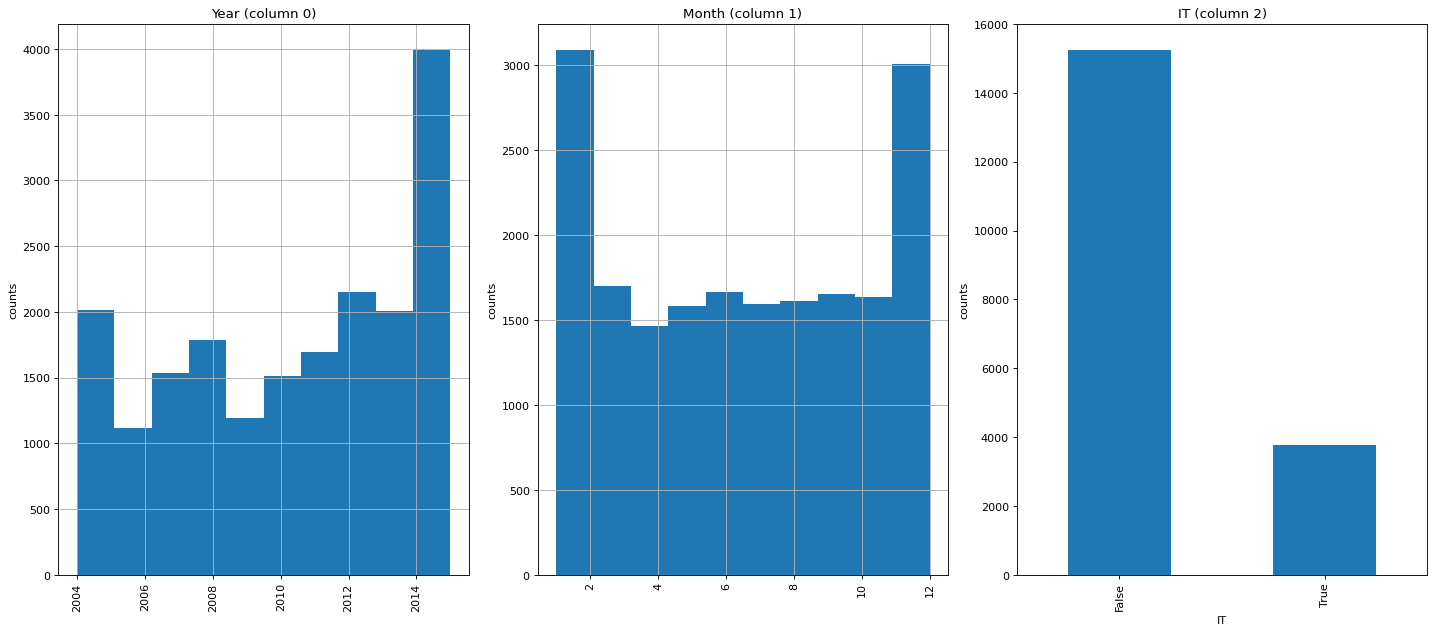

In [24]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int(np.ceil(nCol / nGraphPerRow))  # Calculate the number of rows as a positive integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Example usage:
plotPerColumnDistribution(df, 10, 5)


### <b>Afficher Dataset sous forme de Dataframe :</b>

In [28]:
# Assuming df is your DataFrame
for i in range(0, df.shape[0]):
    for j in range(0,df.shape[1]):
       if pd.isna(df.iloc[i,j]):
          df.iloc[i, j] = ''
# Display the DataFrame after replacement
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,,,,,,,...,,"To apply for this position, please submit a\r\...",,26 January 2004,,,,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),,,,,,3 months,...,,Please submit a cover letter and resume to:\r\...,,12 January 2004,,The International Research & Exchanges Board (...,,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),,,,,,Renewable annual contract\r\nPOSITION,...,,Please send resume or CV toursula.kazarian@......,,20 January 2004\r\nSTART DATE: February 2004,,The Caucasus Environmental NGO Network is a\r\...,,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,,,,,,,...,,Please send cover letter and resume to Amy\r\n...,,23 January 2004\r\nSTART DATE: Immediate,,,,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,,,,,,,...,,Successful candidates should submit\r\n- CV; \...,,"20 January 2004, 18:00",,,,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,,Full-time,,,,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,,As a company Technolinguistics has a mandate t...,,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",,Full-time,All interested professionals.,,ASAP,Long-term with a probation period of 3 months.,...,,All interested candidates are kindly requested...,30 December 2015,20 January 2016,,,,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",,Full-time,All interested professionals.,,ASAP,Long-term with a probation period of 3 months.,...,,All interested candidates are kindly requested...,30 December 2015,20 January 2016,,,,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,,,,,,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,,San Lazzaro LLC works with several internation...,,2015,12,False


### <b>Supprimer caractère '/r/n':</b>

In [29]:
# Fonction pour supprimer le caractère \r\n d'une chaîne
def remove_newline(text):
    if isinstance(text, str):  # Vérifier si la valeur est une chaîne de caractères
        return text.replace('\r\n', '')
    else:
        return text  # Retourner la valeur inchangée si ce n'est pas une chaîne de caractères

# Appliquer la fonction remove_newline à chaque valeur de chaque colonne
df = df.applymap(remove_newline)

# Afficher le DataFrame mis à jour
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting CompanyJOB TITLE:...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,,,,,,,...,,"To apply for this position, please submit acov...",,26 January 2004,,,,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),,,,,,3 months,...,,Please submit a cover letter and resume to:IRE...,,12 January 2004,,The International Research & Exchanges Board (...,,2004,1,False
2,Caucasus Environmental NGO Network (CENN)JOB T...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),,,,,,Renewable annual contractPOSITION,...,,Please send resume or CV toursula.kazarian@......,,20 January 2004START DATE: February 2004,,The Caucasus Environmental NGO Network is anon...,,2004,1,False
3,Manoff GroupJOB TITLE: BCC SpecialistPOSITION...,"Jan 7, 2004",BCC Specialist,Manoff Group,,,,,,,...,,Please send cover letter and resume to AmyPear...,,23 January 2004START DATE: Immediate,,,,2004,1,False
4,Yerevan Brandy CompanyJOB TITLE: Software Dev...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,,,,,,,...,,Successful candidates should submit- CV; - 2 r...,,"20 January 2004, 18:00",,,,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGOTITLE: Senior Creative U...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,,Full-time,,,,Long-term,...,Competitive,"To apply for this position, please send yourde...",29 December 2015,28 January 2016,,As a company Technolinguistics has a mandate t...,,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",,Full-time,All interested professionals.,,ASAP,Long-term with a probation period of 3 months.,...,,All interested candidates are kindly requested...,30 December 2015,20 January 2016,,,,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",,Full-time,All interested professionals.,,ASAP,Long-term with a probation period of 3 months.,...,,All interested candidates are kindly requested...,30 December 2015,20 January 2016,,,,2015,12,False
18999,San Lazzaro LLCTITLE: Head of Online Sales ...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,,,,,,Long-term,...,Highly competitive,Interested candidates can send their CVs to:i....,30 December 2015,29 January 2016,,San Lazzaro LLC works with several internation...,,2015,12,False


### <b>Vectorisation:</b>

In [30]:
# Initialiser le vectorizer TF-IDF
vectorizer = TfidfVectorizer()

# Transformer les titres de poste en matrice TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['Title'])

# Afficher la matrice TF-IDF
print(tfidf_matrix.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### <b>Sauvegarde de vectorizer et la matrice TF-IDF et les datasets apres traitement :</b>

In [31]:
# Sauvegarder le vectorizer
BASE_DIR = os.getcwd() 
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Sauvegarder la matrice TF-IDF
with open('tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)

# Sauvegarder les données des offres d'emploi
df.to_csv('job_data.csv', index=False)


In [32]:

# Lister les fichiers dans le répertoire de base
for file in os.listdir(BASE_DIR):
    if file.endswith('.pkl') or file.endswith('.csv'):
        print(file)


data job posts.csv
fake_or_real_news.csv
job_data.csv
tfidf_matrix.pkl
tfidf_vectorizer.pkl


### <b>recommendation basé sur le contenu:</b>

In [33]:
def recommend_jobs(user_job_title, top_n=5):
    # Charger le vectorizer et la matrice TF-IDF
    with open('tfidf_vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)
    with open('tfidf_matrix.pkl', 'rb') as f:
        tfidf_matrix = pickle.load(f)
    
    # Transformer le titre de poste de l'utilisateur en vecteur TF-IDF
    user_tfidf = vectorizer.transform([user_job_title])
    
    # Calculer la similarité cosinus entre le titre de poste de l'utilisateur et les titres dans la base de données
    similarities = cosine_similarity(user_tfidf, tfidf_matrix)
    
    # Obtenir les indices des offres les plus similaires
    similar_indices = similarities.argsort()[0][-top_n:][::-1]
    
    # Charger les données des offres d'emploi
    job_data = pd.read_csv('job_data.csv')
    
    # Retourner les offres les plus similaires
    return job_data.iloc[similar_indices]


In [36]:
# Tester la fonction de recommandation
user_job_title = 'Data Analyst'
recommended_jobs = recommend_jobs(user_job_title)
recommended_jobs

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
2192,SCDM LLCTITLE: Data AnalystTERM: Full timeST...,"Feb 24, 2006",Data Analyst,SCDM LLC,NaN,Full time,NaN,NaN,ASAP,Permanent,...,Competitive + paid overtime + bonuses.,Please email your CV and Cover Letter to:njdeh...,24 February 2006,15 March 2006,NaN,SCDM LLC founded in 2005 provides software dev...,NaN,2006,2,False
5140,"Synergy International Systems, Inc./ ArmeniaTI...","Apr 8, 2008",Data Analyst,"Synergy International Systems, Inc./ Armenia",NaN,Full time,NaN,NaN,Immediate,Long Term,...,NaN,Candidates who meet these qualifications willb...,08 April 2008,14 April 2008,NaN,"Synergy International Systems, Inc. is a U.S. ...",NaN,2008,4,False
11620,National InstrumentsTITLE: Data AnalystTERM: ...,"May 15, 2012",Data Analyst,National Instruments,NaN,Full time,NaN,NaN,Immediate,NaN,...,NaN,Please send resumes to:employment.armenia@... ...,16 May 2012,15 June 2012,NaN,National Instruments (NI) is a high-tech compa...,NaN,2012,5,False
1284,"Synergy International Systems, Inc./ArmeniaTIT...","May 2, 2005",Data Analyst,"Synergy International Systems, Inc./Armenia",NaN,Full time,NaN,NaN,Immediate,NaN,...,NaN,"If interested, please send your resume with ac...",02 May 2005,"15 May 2005, 5:00 PM",NaN,"Synergy International Systems, Inc. is a U.S. ...",NaN,2005,5,False
4842,"""K-Telecom"" CJSC /VivaCell/TITLE: Data Analys...","Feb 7, 2008",Data Analyst,"""K-Telecom"" CJSC /VivaCell/",NaN,Full time,All interested candidates,NaN,01 March 2008,Permanent with three months probation period,...,VivaCell offers a competitive compensationincl...,Please send your CV to:dataanalyst@....Please ...,07 February 2008,20 February 2008,NaN,VivaCell is the leading mobile operator in Arm...,NaN,2008,2,False


### <b>Enregistrer datasetset sous forme json :</b>

In [38]:
output_path = 'datasetjob1.json'
df.to_json(output_path, orient='records')
print("Fichier JSON créé avec succès.")

Fichier JSON créé avec succès.
